In [1]:
install.packages("readxl")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [28]:
library("readxl")
library(ggplot2)
library(dplyr)


In [11]:
# setting plot size
options(repr.plot.width=15,repr.plot.height=10 )

In [36]:
data <- read_excel("Employees.xlsx")
data

EMPID,EMPNAME,SALARY,HireDate,Dept
<dbl>,<chr>,<dbl>,<dttm>,<chr>
1,Gamal,623.30,2010-01-01,IT
2,Kumar,515.20,2020-09-23,Operations
3,Varpan,611.00,2016-11-15,IT
4,Raj,729.00,2011-05-11,HR
5,Kamal,843.25,2019-03-27,Finance
6,Navpreet,578.00,2018-05-21,IT
7,Manmeet,632.80,2012-07-30,Operations
8,X,722.50,2013-06-17,Finance


In [5]:
summary(data)

     EMPID        EMPNAME              SALARY     
 Min.   :1.00   Length:8           Min.   :515.2  
 1st Qu.:2.75   Class :character   1st Qu.:602.8  
 Median :4.50   Mode  :character   Median :628.0  
 Mean   :4.50                      Mean   :656.9  
 3rd Qu.:6.25                      3rd Qu.:724.1  
 Max.   :8.00                      Max.   :843.2  
    HireDate                       Dept          
 Min.   :2010-01-01 00:00:00   Length:8          
 1st Qu.:2012-04-09 12:00:00   Class :character  
 Median :2015-03-02 12:00:00   Mode  :character  
 Mean   :2015-04-30 03:00:00                     
 3rd Qu.:2018-08-06 12:00:00                     
 Max.   :2020-09-23 00:00:00                     

#### Scatter plot

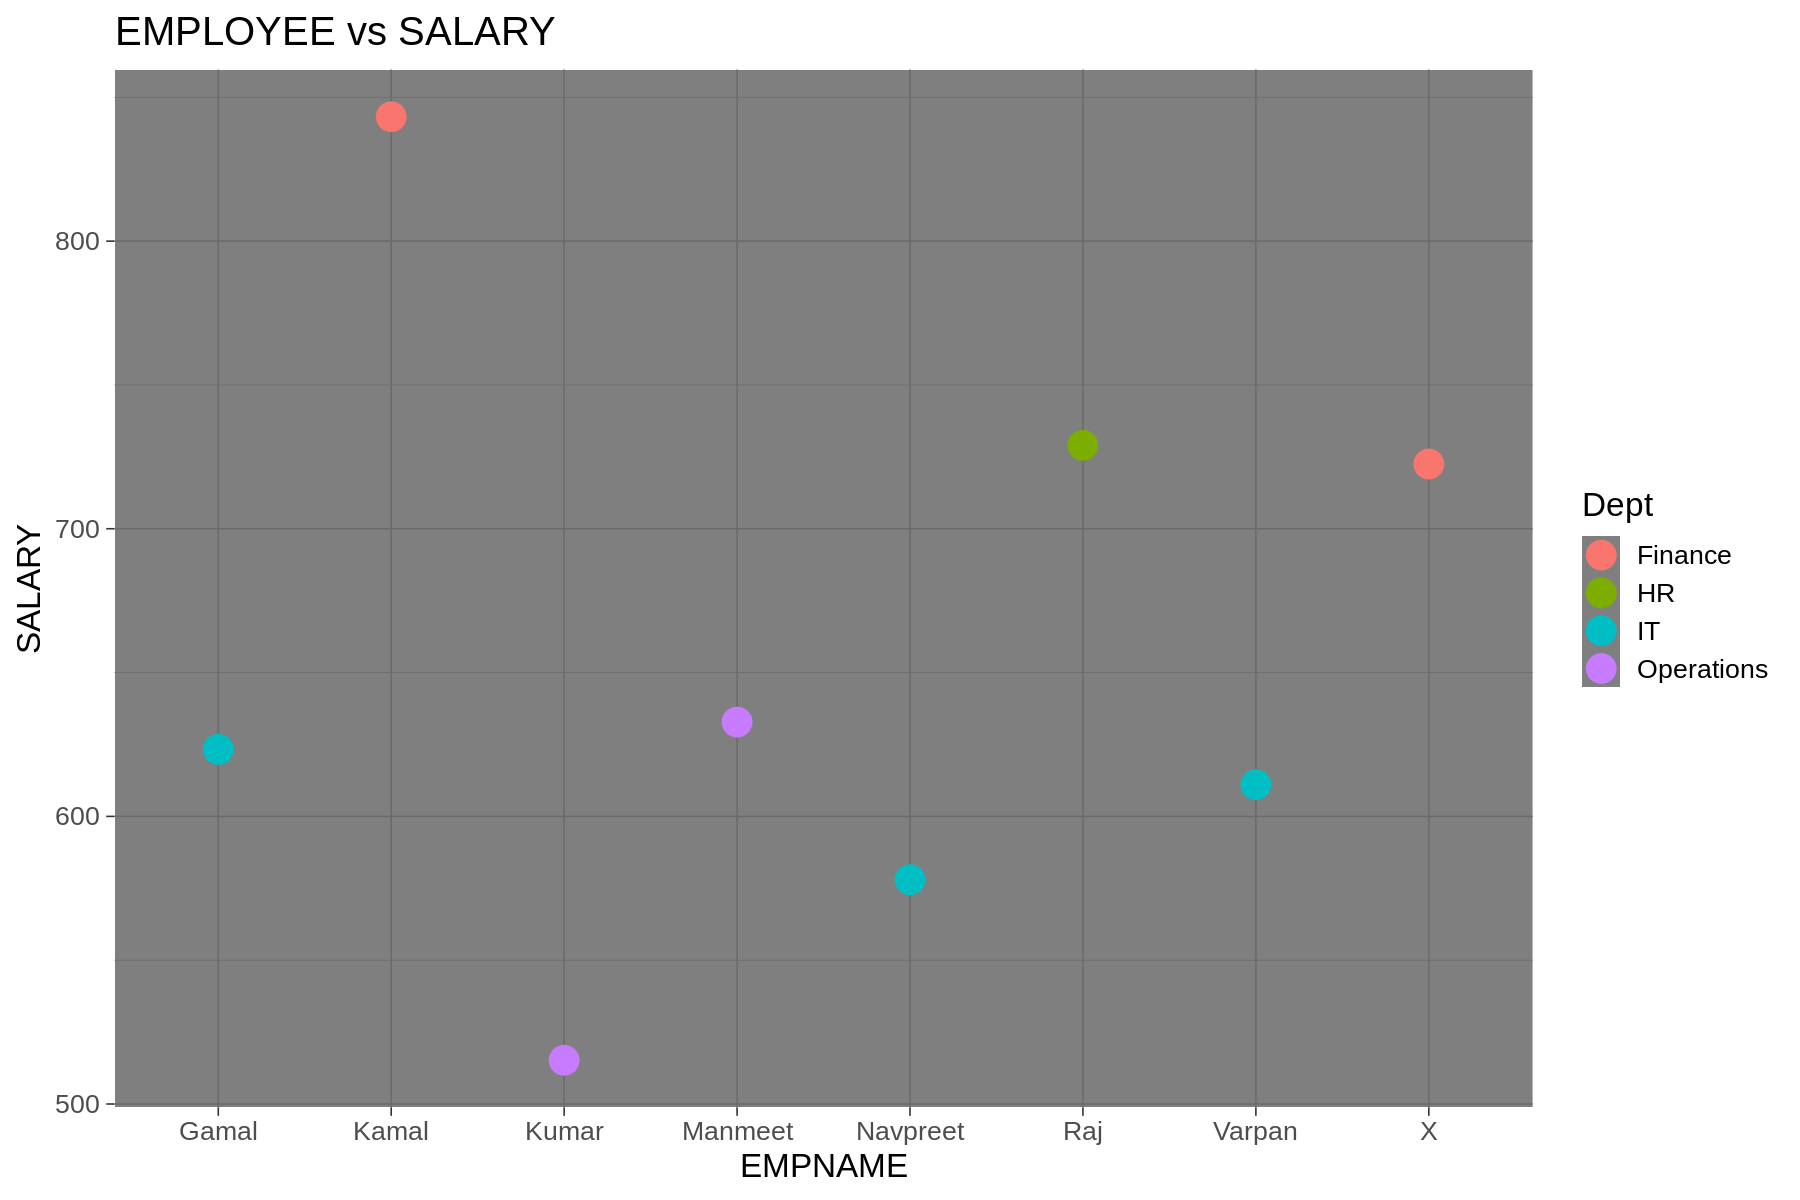

In [87]:
q <- ggplot(data, aes(y=SALARY, x=EMPNAME, color=Dept)) +
    geom_point(size = 8) +ggtitle('EMPLOYEE vs SALARY')
q+ theme_dark(base_size = 20)

#### Bar plot

Dept,SALARY
<chr>,<dbl>
Finance,782.875
HR,729.000
IT,604.100
Operations,574.000


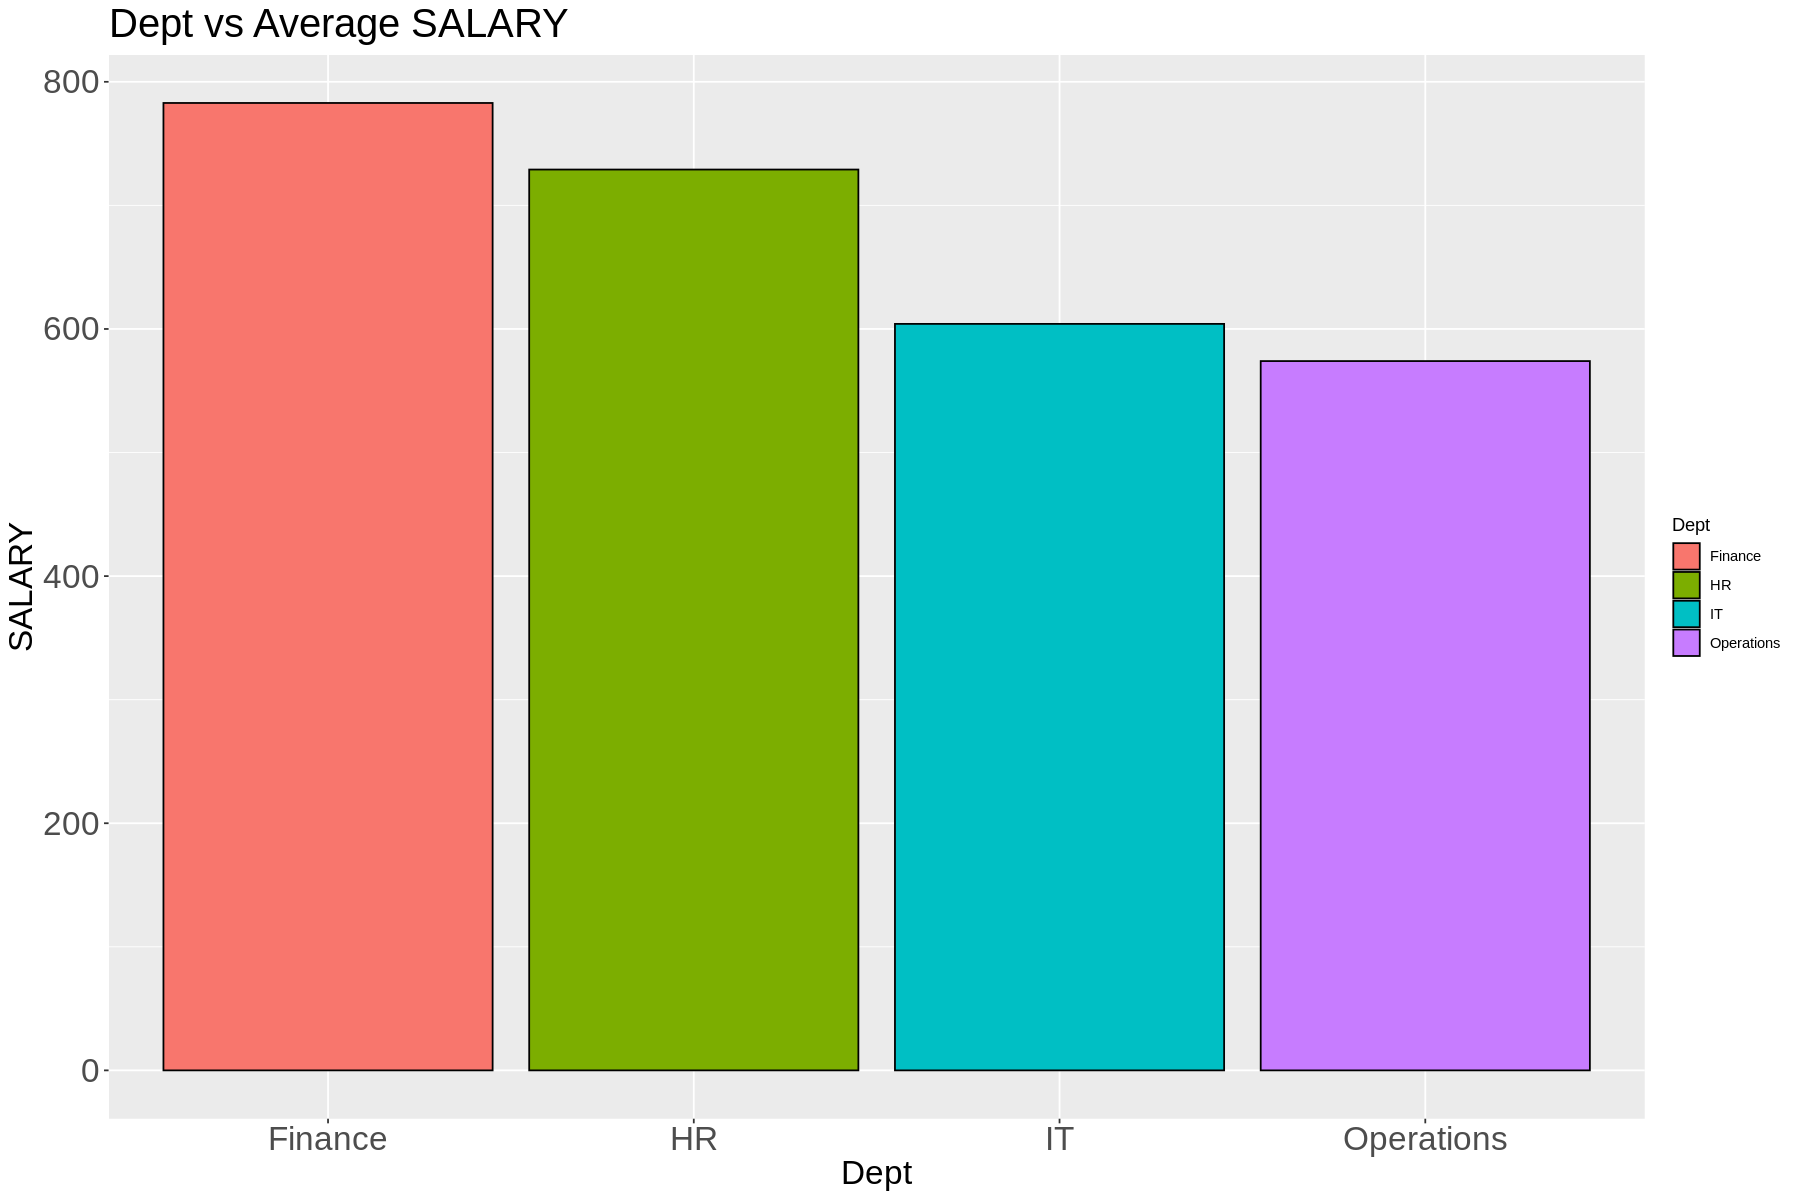

In [82]:
# aggregating wrt mean salary
temp_data <- summarise_at(group_by(data,Dept),vars(SALARY),funs(mean(.,na.rm=TRUE)))
temp_data
# plotting
ggplot(temp_data, aes(y=SALARY, x=Dept, fill=Dept)) + geom_bar(stat = "identity", color='black') + ggtitle('Dept vs Average SALARY') + 
theme(plot.title = element_text(size=24), axis.text = element_text(size = 20), axis.title = element_text(size = 20))


from the above graph, we can say that people in Finance have higher average salary than other departments. On the other hand, people in operations department have lowest average salary. Last but not least, even though people in HR departments have higher average salary, but we cant conclude that because we dont have enough data for HR department.

### Line plot

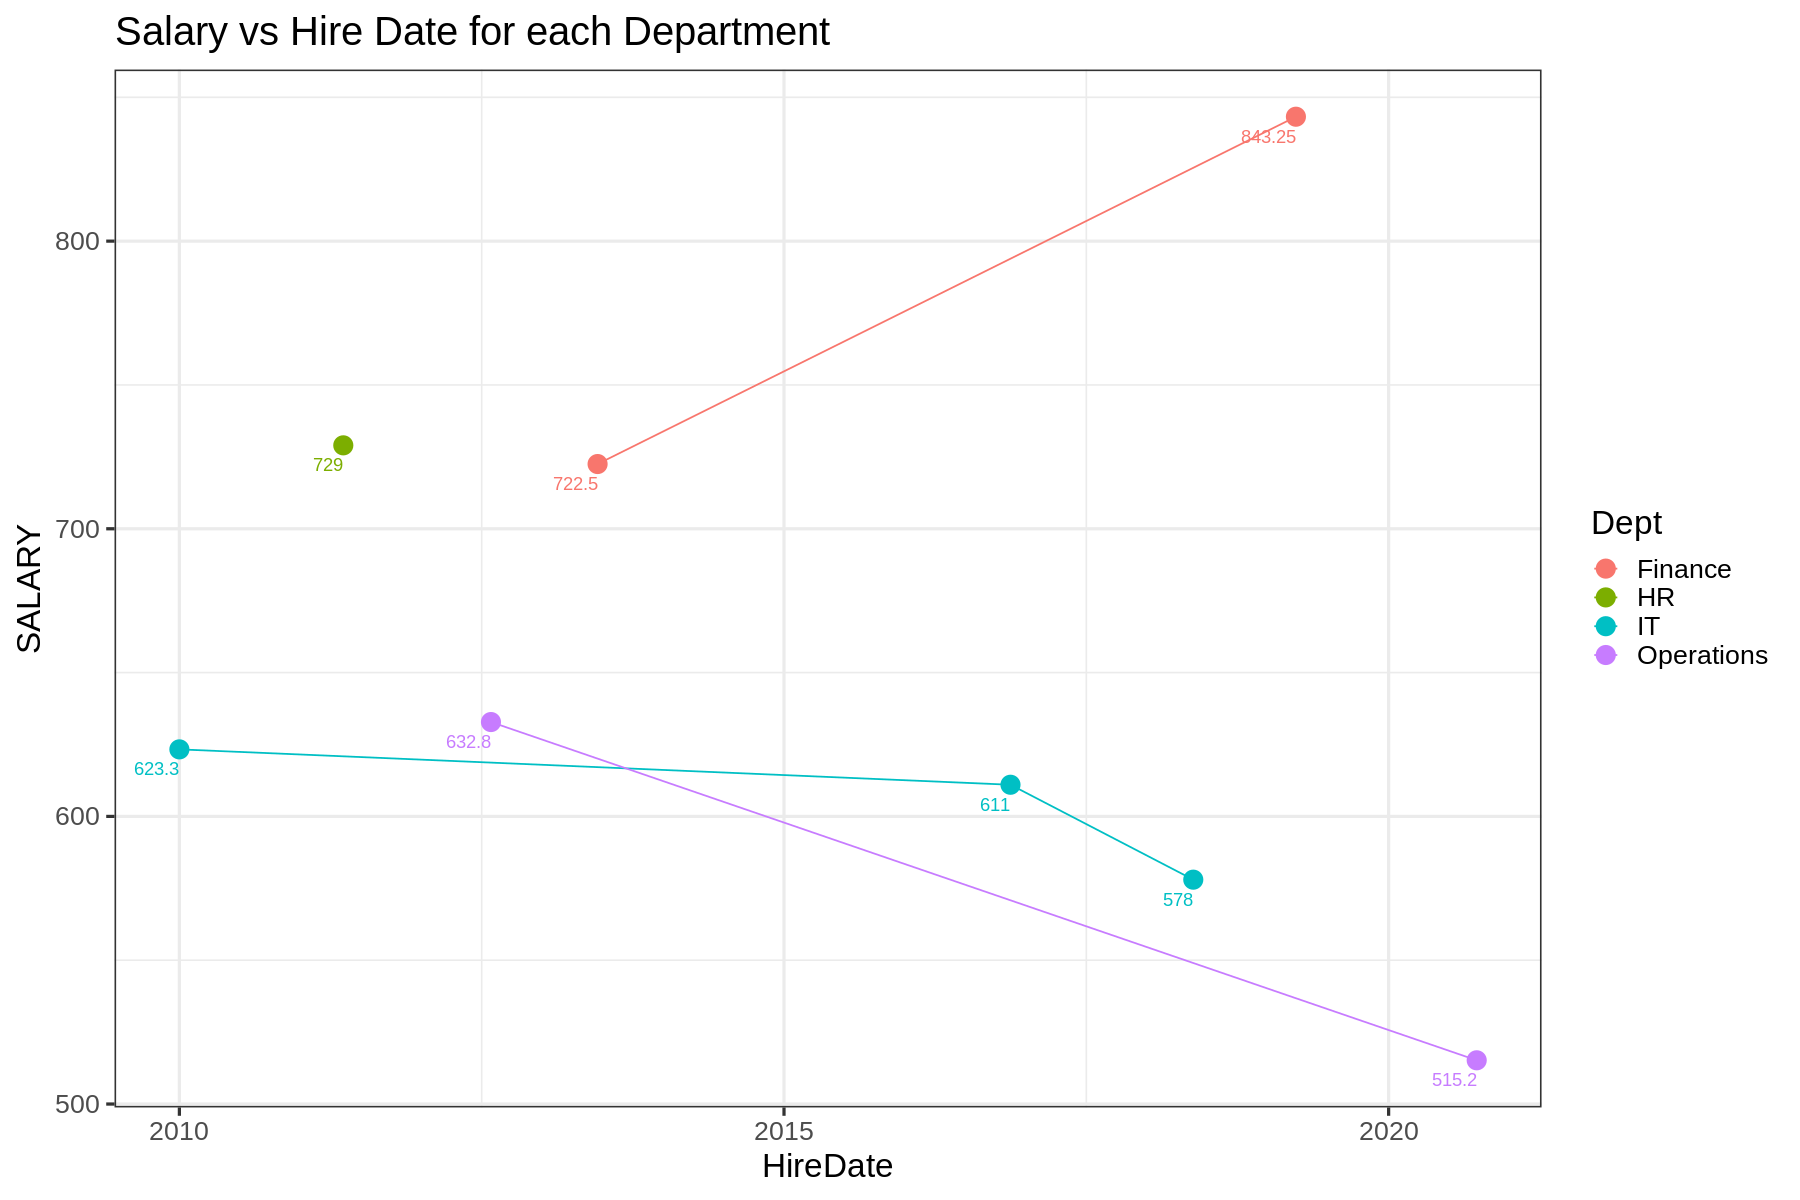

In [122]:
ggplot(data, aes(x=HireDate, y=SALARY,group=Dept, colour = Dept, label=SALARY )) +
    geom_line()+ geom_point(size=5)+ ggtitle('Salary vs Hire Date for each Department')+geom_text(hjust=1, vjust=2) +theme_bw(base_size = 20)

##Lowest salary in each *Department*

In [121]:
min_data <- summarise_at(group_by(data,Dept),vars(SALARY),funs(min(.,na.rm=TRUE)))
min_data

Dept,SALARY
<chr>,<dbl>
Finance,722.5
HR,729.0
IT,578.0
Operations,515.2


##Highest salary in each *Department*

In [120]:
max_data <- summarise_at(group_by(data,Dept),vars(SALARY),funs(max(.,na.rm=TRUE)))
max_data

Dept,SALARY
<chr>,<dbl>
Finance,843.25
HR,729.00
IT,623.30
Operations,632.80


From the graph, we can infer that people who have more experience in each department has higher salary except for the finance department. It can be because salary depends on the position in Finance department rather than experience. 

##Technical Perspectives of Packages used
1) ggplot2: ggplot2 is a plotting package used in R. It helps us to plot various graphs such as scatter, bar, line and so on so that we can visualize the data. We can also customize the themes of the graphs to make it asthetically pleasing. We can also easily add various subplots to make comparisons. We can also change the text size of the graphs.

2) readxl: readxl package is used to read the excel file and load the data into the dataframe.

3) dyplr: dyplr package is used in R for data manipulation. We used summarize and group_by functions to manipulate the data such as grouping data into each departments based on salary.

##Conclusion
From the above visualization of data, we can draw some conclusions:

a) The comapany may be a small startup company.

b) People in Finance departments have more average salary than other departments. 

c) Except finance department,people have more salary if they have more experience.Therefore, experience matters in other departments in this company.

d) Among all the staffs Kamal has the highest salary in Finance department, there is strong indication that he is the CEO of the comapny who is also handling Finance Department as it is a very small startup company.
